<a href="https://colab.research.google.com/github/Elwing-Chou/kmuml/blob/main/kmu%E6%97%A9%E4%B8%8A0107.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
from urllib.request import urlretrieve
url = "https://github.com/Elwing-Chou/kmuml/raw/main/data01.csv"
urlretrieve(url, "data.csv")

('data.csv', <http.client.HTTPMessage at 0x7cb53d0adff0>)

hypertensive: Blood pressure higher than 180/120 mm Hg is considered a hypertensive emergency or crisis

atrialfibrillation: 心房顫動

CHD with no MI: 冠狀動脈心臟病 with no 心肌梗塞

deficiencyanemias: 缺鐵性貧血(Iron deficiency anemia)是一種常見的貧血

depression: 憂鬱

Hyperlipidemia 認識高脂血症

renal failure: 腎臟 failure

COPD: 慢性阻塞性肺病

Systolic blood pressure: 收縮壓

Diastolic blood pressure: 蘇張壓

Respiratory rate: 呼吸率

SPO2: 血氧飽和度監測

Urine output: 尿尿

hematocrit: 紅血球容積比

RBC: 紅血球計數

MCH: 平均紅血球血紅素

MCHC: 平均紅血球血紅素濃度

MCV: 平均血球容積(MCV)

RDW: 紅血球分布寬度

Leucocyte: White blood cell

Platelets: 血小板計數

Neutrophils: 嗜中性球亦稱嗜中性白血球

Basophils: 嗜鹼性球

Lymphocyte: 淋巴球

PT: 凝血脢原時間

INR: INR =(Patient’s PT/MNPT)ISI, 跟PT有關

NT-proBNP: 定量血漿中的NT-ProBNP，可幫助診斷充血性心衰竭

Creatine kinase: 肌酸激酶

Creatinine: 肌酸酐

Urea nitrogen: 血中尿素氮

glucose: 葡萄糖

Blood potassium: 鉀

Blood sodium: 鈉

Blood calcium: 鈣

Chloride: 氯化物

Anion gap: 陰離子間隙

Magnesium ion: Mg 2+

PH: 酸鹼

Bicarbonate: HCO−3.

Lactic acid: 乳酸

PCO2: CO2分壓

EF: 收縮分率

Target Variable - Outcome 0 - Alive 1 - Death

In [55]:
import pandas as pd
data = pd.read_csv("data.csv", encoding="utf-8")
data

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,2,171130,0.0,62,1,25.516870,1,1,0,1,...,136.714286,10.271429,94.428571,20.142857,2.714286,NaN,27.714286,NaN,NaN,40
1173,2,101659,0.0,78,1,25.822710,0,1,0,1,...,135.680000,10.523529,101.720000,18.160000,2.012500,NaN,20.480000,NaN,NaN,30
1174,2,162069,0.0,85,2,23.891779,1,1,0,1,...,136.000000,8.466667,97.285714,14.000000,2.028571,NaN,28.857143,NaN,NaN,55
1175,2,120967,0.0,79,2,35.288554,0,0,1,1,...,140.000000,8.183333,104.000000,15.750000,2.090000,NaN,24.375000,NaN,NaN,25


In [56]:
data["outcome"].value_counts()

0.0    1017
1.0     159
Name: outcome, dtype: int64

資料預處理SOP

1. 把所有空的格子補滿(填補缺失值): 最可能的那個
    a. 類別型: diabetes -> 最常出現的那種/不填補(one-hot 0000)
    b. 數值型: age -> 中位數而非平均

2. One-Hot: 對於類別型態必做不可

什麼時候可以不做one-hot: 二值型. 大小關係類別(艙等)

In [57]:
# 這個資料比較特別, 某筆資料outcome是空的, 去掉
# isna notna
# 篩選: 表格[跟你資料筆數依樣多True/False]
fil = data["outcome"].notna()
data = data[fil]

In [58]:
# 把輸入和輸出分開
# 上次的axis這參數
x = data.drop(["group", "ID", "outcome"], axis=1)
y = data["outcome"].astype(int)

丟掉 v.s. 補起來

1. 補: 缺點: 補不準的話會降低平常的準確率
2. 丟: 缺點: 天花板正確率會降低

不要關在準確率的象牙塔:
一般時候缺太多, 我就把他丟了!
如果是競賽, 我就會把她留著

In [59]:
# 把缺幾個統計出來
s = x.isna().sum()
fil = s > 0
s[fil].sort_values(ascending=False)

PCO2                        293
PH                          291
Basophils                   259
Lactic acid                 228
BMI                         214
Creatine kinase             165
Lymphocyte                  145
Neutrophils                 144
Urine output                 35
PT                           20
INR                          20
temperature                  18
glucose                      17
Diastolic blood pressure     15
Systolic blood pressure      15
Respiratory rate             12
SP O2                        12
heart rate                   12
Blood calcium                 1
dtype: int64

類別型態千萬別誤捕乘中位數

In [60]:
n = x.nunique()
categories = n[n < 5].index
numbers = n[n >= 5].index
med = x.median()[numbers]
x = x.fillna(med)

In [61]:
# 你一定要做one-hot 那我今天不做的原因是沒缺 而且 所有類別都是二值
#　pd.get_dummies(x, columns=categories)

以後拿到一個表格
1. 對數值欄位補中位數
2. 把類別欄位做one-hot

In [62]:
# demo numpy
import numpy as np
a = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
])
# numpy的操作: array[對每個軸執行list的選用操作]
# 取段: [start:end(exclusive)]
# 取個: [idx]
a[:3, :2]
a[::-1, ::-1]
a[::2, ::2]
a[:, 0]
a[:, 1]

array([ 2,  5,  8, 11])

In [63]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
scaler = MinMaxScaler()
x_scale = scaler.fit_transform(x)
tsne = TSNE(n_components=2)
x_tsne = tsne.fit_transform(x_scale)
x_tsne

array([[ 32.5931   ,   4.1150317],
       [-35.517124 ,  -6.6842914],
       [-36.268238 , -11.593864 ],
       ...,
       [ 20.796576 , -13.044789 ],
       [ 33.68696  ,  16.245176 ],
       [ 29.113708 ,  -4.1721683]], dtype=float32)

<Axes: >

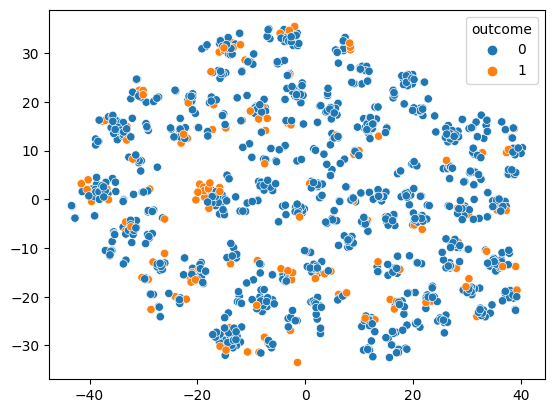

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
x_axis = x_tsne[:, 0]
y_axis = x_tsne[:, 1]
sns.scatterplot(x=x_axis, y=y_axis, hue=y)

imbalanced data
1. 更換指標(準確率)
2. (輔助方式) 數據增強/數據削弱

PR: 我說他生病, 那他真的生病的機率
RE: 生病了的人裡面我召回了幾個
RE高: 寧可錯殺, 也不放過
PR高: 很肯定才抓你

f1 score(調和平均): 2 * PR * RE / (PR + RE)

一般情況我喜歡數據削弱/如果少的那端真的少我會選數據增強

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [67]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy="minority")
x_s, y_s = smote.fit_resample(x_train, y_train)

<Axes: >

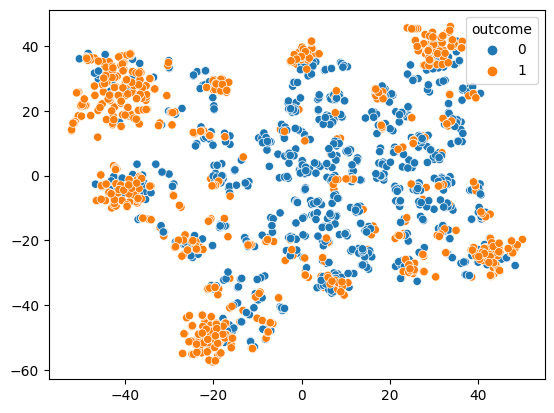

In [70]:
scaler = MinMaxScaler()
x_scale = scaler.fit_transform(x_s)
tsne = TSNE(n_components=2)
x_tsne = tsne.fit_transform(x_scale)
x_axis = x_tsne[:, 0]
y_axis = x_tsne[:, 1]
sns.scatterplot(x=x_axis, y=y_axis, hue=y_s)

每個演算法拒絕"完美訓練"(過擬和)

1. 決策樹拒絕過擬和: 最大深度

決策樹增強: 隨機森林

In [97]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=4, n_estimators=100)
clf.fit(x_s, y_s)
pre = clf.predict(x_test)
print(classification_report(y_test, pre))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       103
           1       0.54      0.47      0.50        15

    accuracy                           0.88       118
   macro avg       0.73      0.70      0.72       118
weighted avg       0.87      0.88      0.88       118

